## Demonstration for finding the best regression line on the given data points:
This code provides 2d interative regression line plot.
Given equation: y = ax + b. After solving the derivatives of the loss
function- MES w.r.t 'a' and 'b', the value of 'a' and 'b' are found as
follows: <br>
a =  ∑𝑖=1-𝑁(x𝑖y𝑖−x𝑖y¯)/∑𝑖=1-𝑁(x𝑖2−x𝑖x¯)  and, <br> b = y¯− ax¯


In [7]:
# Import Necessary libraries
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Function to calculate 'a' and 'b' in equation:y = ax + b
def my_linearfit(x, y):
    """
    :param x(ndarray): x-values/feature vectors
    :param y(ndarray): y-values/prediton values
    :return a and b: weight/slope and bias/intercept  respectively
    """
    sum_xy = (x * y).sum()
    sum_x = x.sum()
    mean_y = y.mean()
    sum_xx = (x ** 2).sum()
    mean_x = x.mean()
    # a and b after derivatives
    a = (sum_xy - (sum_x * mean_y)) / (sum_xx - (sum_x * mean_x))
    b = mean_y - a * mean_x
    return a, b


In [12]:
# Define mouse click event function
def onclick(event):
    """This function requires at least two data points to find the best fit regression line"""

    global count
    # right button click
    if str(event.button) == 'MouseButton.RIGHT':
        # Incase first click is 'right button'
        if count < 2:
            print('Click left mouse button to plot data points')

        else:
            fig.canvas.mpl_disconnect(cid) # Disconnect callback id 'cid'
            a, b = my_linearfit(np.array(x_coordinates), np.array(y_coordinates))# call my_linearfit function
            print('Best fit line: a = {}, and b = {} '.format(a,b)) # print a and b
            plt.plot(np.array(x_coordinates), a*np.array(x_coordinates)+b, '-r')# plot regression line
            fig.canvas.draw()  # show in figure

    # left button click
    if str(event.button) == 'MouseButton.LEFT':
        count += 1
        x_coordinates.append(event.xdata)# append x-value
        y_coordinates.append(event.ydata)# append y-value
        plt.plot(event.xdata, event.ydata, '*') # mark '*' in fig
        fig.canvas.draw() # show fig

<IPython.core.display.Javascript object>


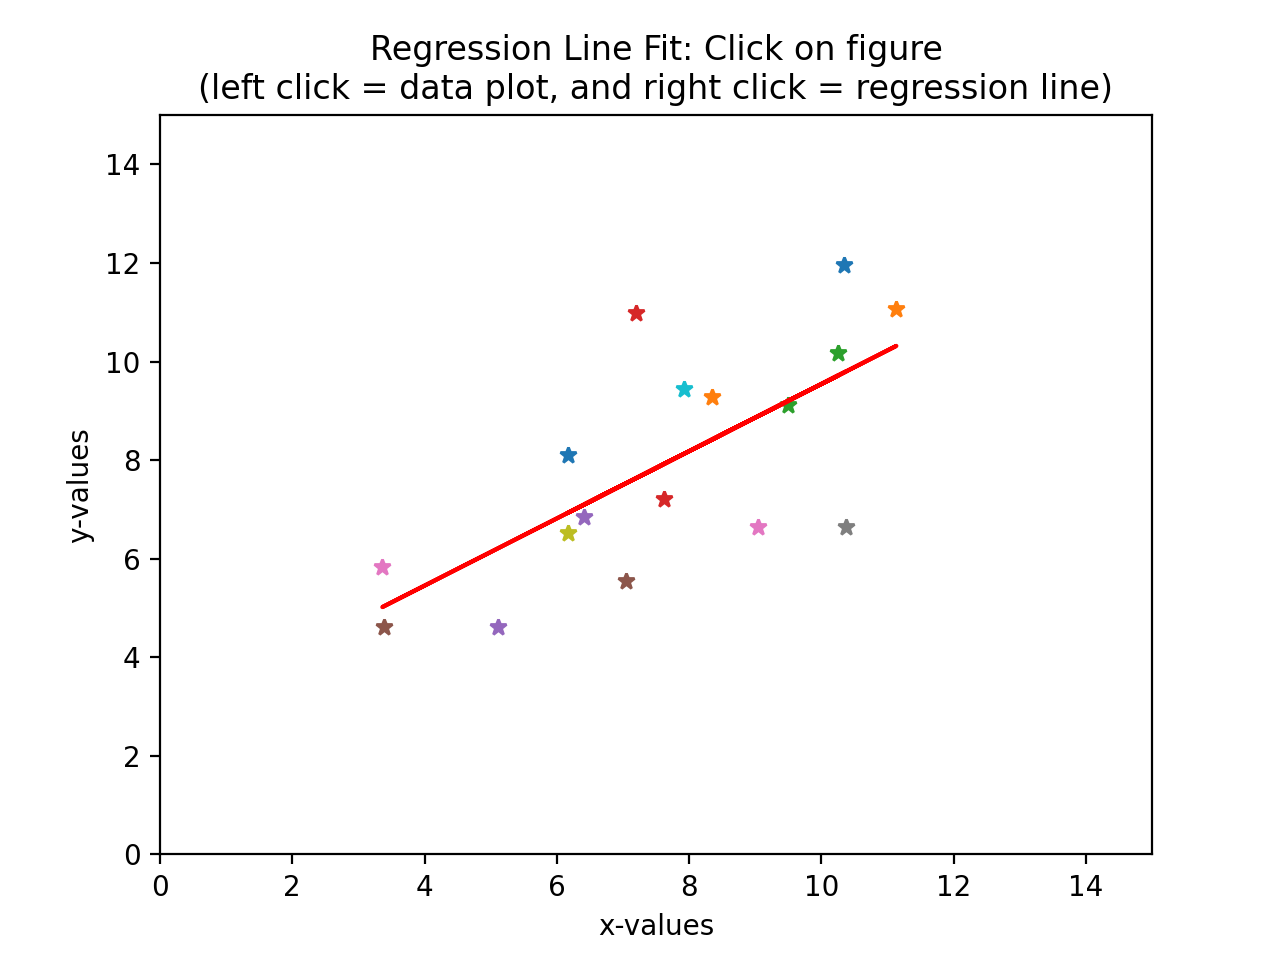

In [16]:

if __name__ == "__main__":
    x_coordinates = []  # store x-coordiantes
    y_coordinates = []  # store y-coordiantes
    count = 0 #count clicks

    # setup  figure
    fig = plt.figure()
    ax = fig.add_subplot() # sub-plot
    ax.set_xlim([0, 15]) # set x-limit of the current axes
    ax.set_ylim([0, 15]) # set x-limit of the current axes
    plt.xlabel('x-values') # set xlabel
    plt.ylabel('y-values') # set ylabel
    plt.title('Regression Line Fit: Click on figure\n(left click = data plot, and right click = regression line)') # set title

    # connect mouse click event and return connection id
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show() #show figure